In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


0 - GEMME

1 - Rosetta_ddg_norm

2 - GEMME_mean

3 - rosetta_ddg_mean

4 - hydrophobicity

5 - GEMME_neighbor_scores

6 - rosetta_neigbor_scores

7 - wcn

## CYP2C9


In [4]:
cyp2c9_if = pd.read_csv('CYP2C9.csv', index_col=0)
cyp2c9_1v_wt_marginals = pd.read_csv('CYP2C9_wt-marginals.csv', index_col=0)
cyp2c9_1v_masked_marginals = pd.read_csv('CYP2C9_masked-marginals.csv', index_col=0)


In [5]:
# merge the three dataframes into one, the columns of the same name should not be duplicated
cyp2c9_if = cyp2c9_if.merge(cyp2c9_1v_wt_marginals, left_index=True, right_index=True)
cyp2c9_if = cyp2c9_if.merge(cyp2c9_1v_masked_marginals, left_index=True, right_index=True)


In [6]:
# select the columns that not end in _x or _y
cyp2c9_if = cyp2c9_if.loc[:, ~cyp2c9_if.columns.str.endswith('_x')]
cyp2c9_if = cyp2c9_if.loc[:, ~cyp2c9_if.columns.str.endswith('_y')]

In [7]:
esmif_1 = cyp2c9_if[['ESMIF_score', 'abundance_score', 'function_score']]

In [8]:
cyp2c9_if.corr(method ='pearson')[['function_score', 'abundance_score']]

,function_score,abundance_score
esm1v_t33_650M_UR90S_1_wt-marginals,0.188546,0.151485
esm1v_t33_650M_UR90S_2_wt-marginals,0.181756,0.151729
esm1v_t33_650M_UR90S_3_wt-marginals,0.179274,0.142361
esm1v_t33_650M_UR90S_4_wt-marginals,0.184000,0.156676
esm1v_t33_650M_UR90S_5_wt-marginals,0.177279,0.151581
esm2_t33_650M_UR50D_wt-marginals,0.217468,0.182454
esm2_t36_3B_UR50D_wt-marginals,0.225819,0.186076
0,0.418866,0.384244
1,-0.440493,-0.533435
2,0.375329,0.326600


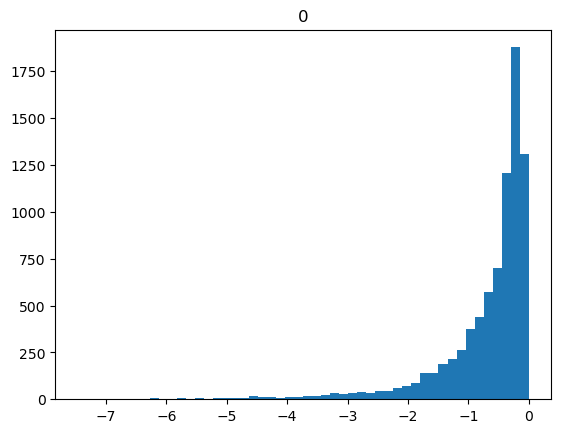

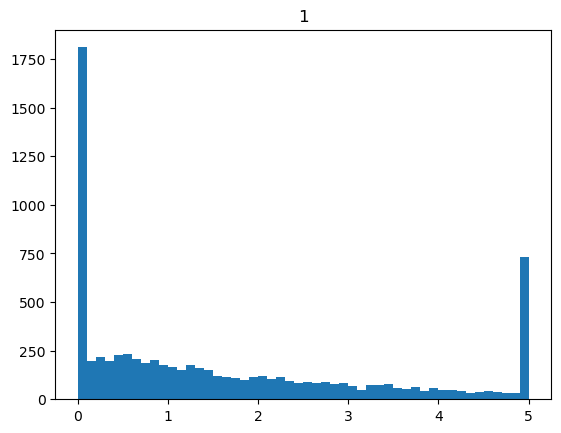

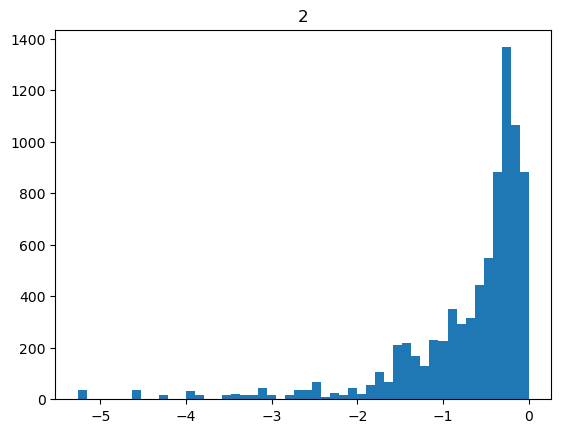

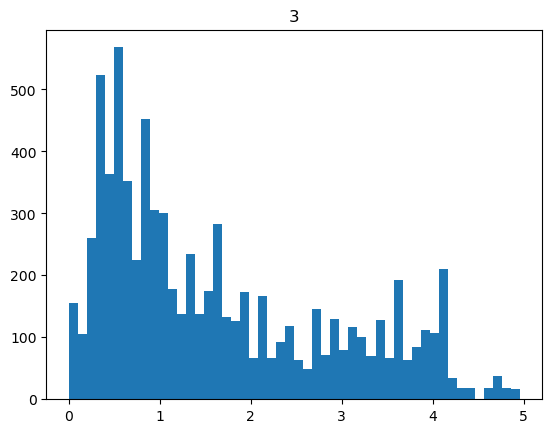

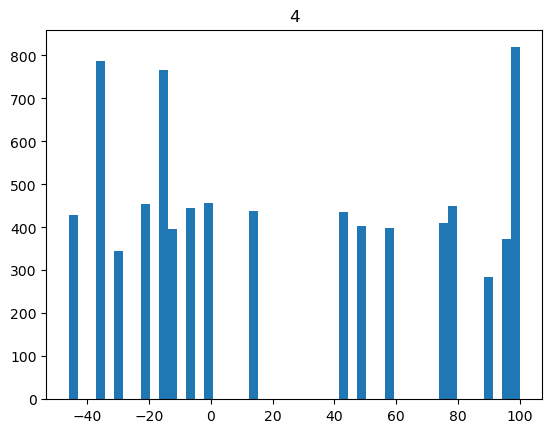

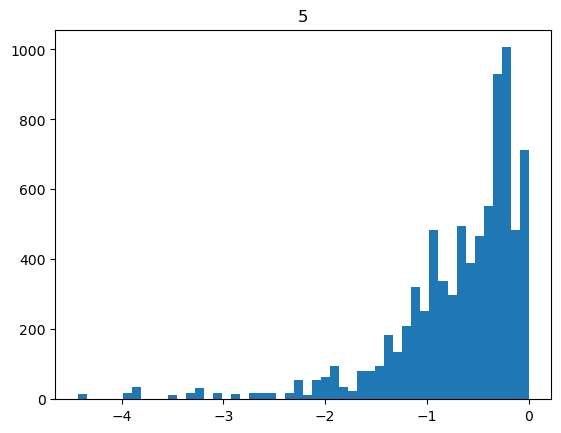

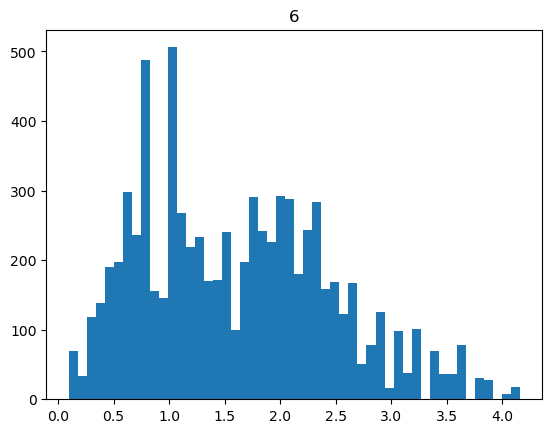

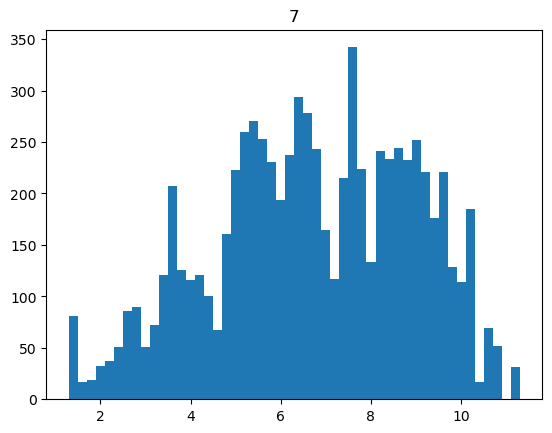

In [35]:
def histo(df, col):
    plt.hist(df[col], bins=50)
    plt.title(col)
    plt.show()

for i in ['0', '1', '2', '3', '4', '5', '6', '7']:
    histo(cyp2c9_if, i)

In [9]:
def score_plotting(df, row):
    # Add the correlation score and a fit line to the scatter plot
    df_adj = df[[row, 'abundance_score', 'function_score']]
    sns.lmplot(data=df_adj[df_adj[row] !=0], x=row, y='abundance_score')
    plt.title('{} vs Abundance'.format(row))
    plt.show()
    
    sns.lmplot(data=df_adj[df_adj[row] !=0], x=row, y='function_score')
    plt.title('{} vs Function'.format(row))
    plt.show()

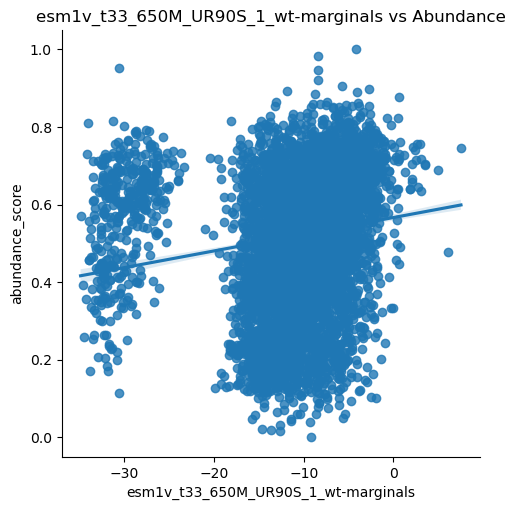

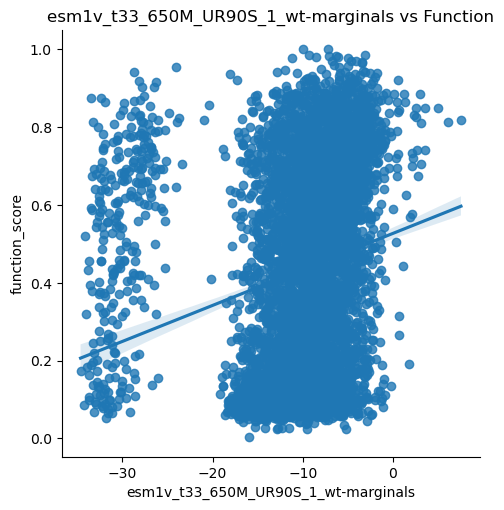

In [10]:
score_plotting(cyp2c9_if, 'esm1v_t33_650M_UR90S_1_wt-marginals')

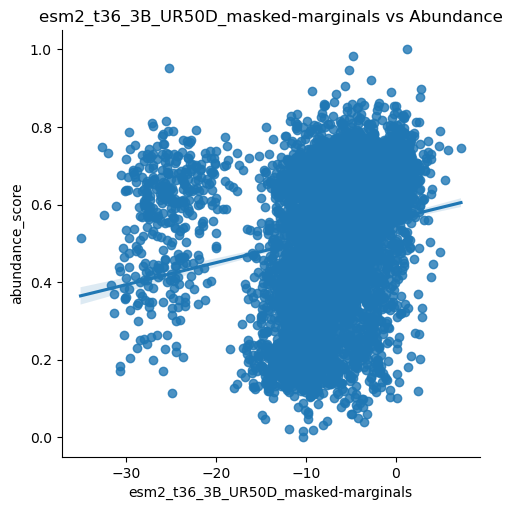

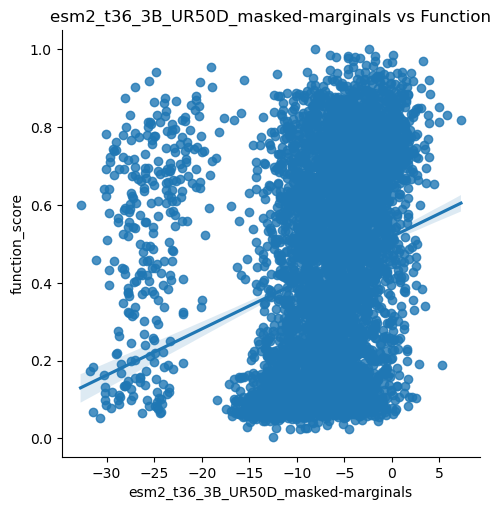

In [11]:
score_plotting(cyp2c9_if, 'esm2_t36_3B_UR50D_masked-marginals')

In [25]:
cyp2c9_if

,esm1v_t33_650M_UR90S_1_wt-marginals,esm1v_t33_650M_UR90S_2_wt-marginals,esm1v_t33_650M_UR90S_3_wt-marginals,esm1v_t33_650M_UR90S_4_wt-marginals,esm1v_t33_650M_UR90S_5_wt-marginals,esm2_t33_650M_UR50D_wt-marginals,esm2_t36_3B_UR50D_wt-marginals,0,1,2,...,ESMIF_score,ESM1v_score,mutant,esm1v_t33_650M_UR90S_1_masked-marginals,esm1v_t33_650M_UR90S_2_masked-marginals,esm1v_t33_650M_UR90S_3_masked-marginals,esm1v_t33_650M_UR90S_4_masked-marginals,esm1v_t33_650M_UR90S_5_masked-marginals,esm2_t33_650M_UR50D_masked-marginals,esm2_t36_3B_UR50D_masked-marginals
0,-12.884929,-10.166253,-12.349302,-12.904819,-15.304207,-13.293009,-12.413673,0.0,NaN,0.0,...,-1.110523,0,M0H,-10.975256,-7.698956,-9.681308,-9.169203,-12.318501,-11.013824,-10.661123
1,-27.072285,-25.704876,-25.763491,-26.126959,-25.243252,-22.007965,-30.882004,0.0,NaN,0.0,...,-1.110523,0,D1_,-23.850834,-23.520142,-22.236441,-23.361107,-22.310011,-20.275440,-28.039846
2,-4.968435,-2.888179,-4.886921,-3.932541,-3.694244,-2.866653,-3.150423,0.0,NaN,0.0,...,-1.110523,0,D1A,-0.954333,-0.147953,-1.315147,-1.328550,-0.492926,0.438698,0.913605
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,0.0,...,-1.110523,0,D1D,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,-6.346389,-4.504066,-5.826594,-4.310066,-4.256901,-4.537838,-6.238230,0.0,NaN,0.0,...,-1.110523,0,D1F,-2.106329,-1.174321,-2.102904,-1.370590,-0.771666,-1.705364,-1.762203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8086,-2.761596,-3.186718,-2.758450,-2.724819,-2.574923,-3.190689,-7.558831,0.0,0.000000,0.0,...,-1.117753,0,V489Q,1.369336,-0.047351,0.958525,0.367866,2.225157,0.933082,-4.348836
8087,2.795769,0.817297,1.255728,2.749825,1.545118,-0.408254,-3.875021,0.0,0.951379,0.0,...,-1.105177,0,V489R,6.608230,4.612653,4.555821,5.875567,6.406917,4.113828,-0.700108
8088,-4.206950,-3.863207,-3.243296,-3.439931,-3.443183,-4.052302,-8.106462,0.0,1.079310,0.0,...,-1.121683,0,V489S,-0.185308,-0.807517,0.305468,-0.422124,0.533836,-0.181871,-4.847766
8089,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2.353103,0.0,...,-1.110523,0,V489V,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


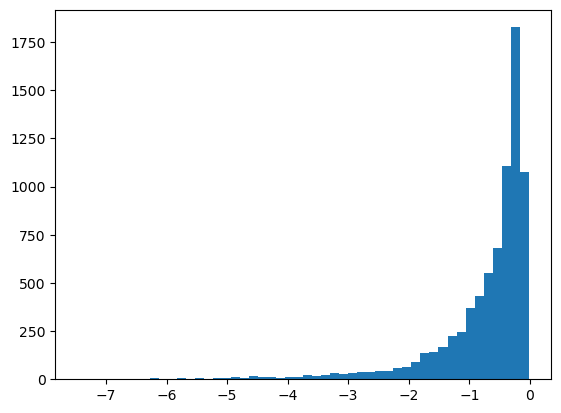

In [30]:
plt.hist(cyp2c9_if[cyp2c9_if['0']<0]['0'], bins=50)
plt.show()

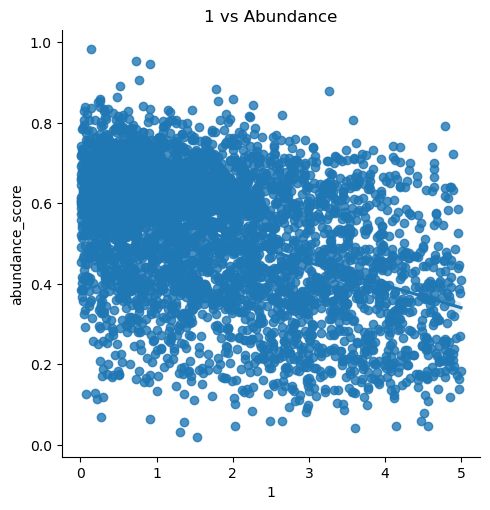

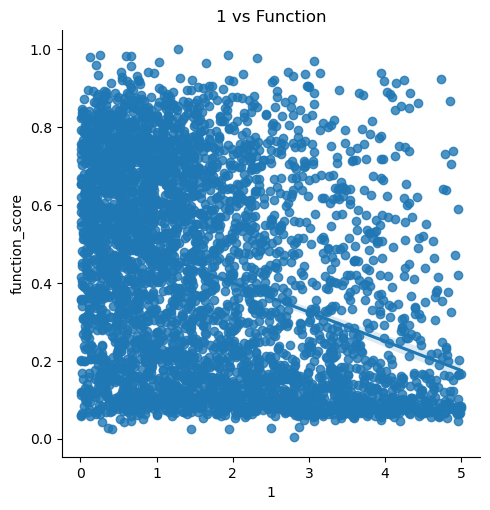

In [34]:
score_plotting(cyp2c9_if[cyp2c9_if['1']!=5], '1')

## NUDT15

In [12]:
nudt15_if = pd.read_csv('NUDT15.csv', index_col=0)
nudt15_1v_wt_marginals = pd.read_csv('NUDT15_wt-marginals.csv', index_col=0)
nudt15_1v_masked_marginals = pd.read_csv('NUDT15_masked-marginals.csv', index_col=0)

In [13]:
nudt15_if = nudt15_if.merge(nudt15_1v_wt_marginals, left_index=True, right_index=True)
nudt15_if = nudt15_if.merge(nudt15_1v_masked_marginals, left_index=True, right_index=True)
nudt15_if = nudt15_if.loc[:, ~nudt15_if.columns.str.endswith('_x')]
nudt15_if = nudt15_if.loc[:, ~nudt15_if.columns.str.endswith('_y')]

In [14]:
nudt15_if.corr(method ='pearson')[['function_score', 'abundance_score']]

,function_score,abundance_score
esm1v_t33_650M_UR90S_1_wt-marginals,0.254438,0.154287
esm1v_t33_650M_UR90S_2_wt-marginals,0.250221,0.157669
esm1v_t33_650M_UR90S_3_wt-marginals,0.258542,0.116762
esm1v_t33_650M_UR90S_4_wt-marginals,0.250779,0.146183
esm1v_t33_650M_UR90S_5_wt-marginals,0.229136,0.172402
esm2_t33_650M_UR50D_wt-marginals,0.266776,0.134338
esm2_t36_3B_UR50D_wt-marginals,0.241299,0.135947
0,0.614757,0.335590
1,-0.080586,-0.067905
2,0.584258,0.257167


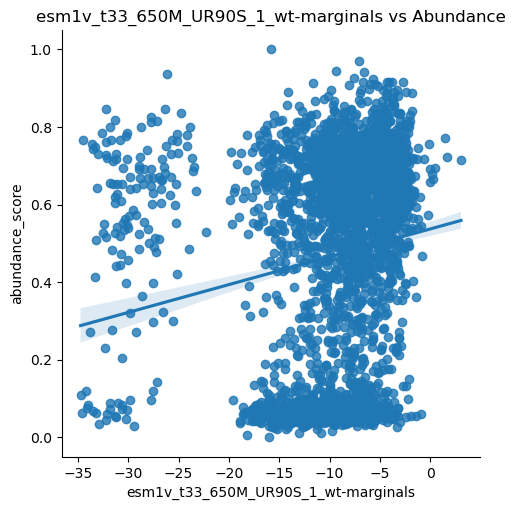

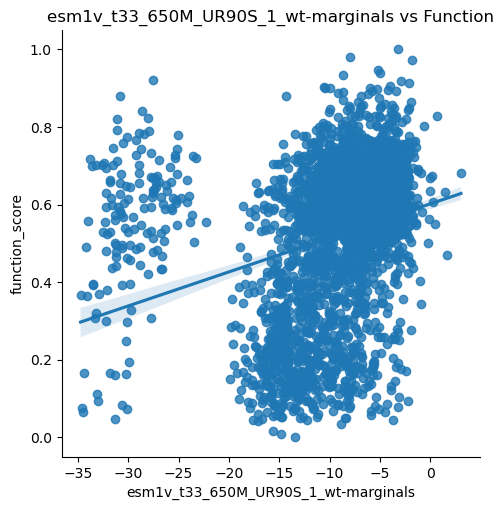

In [15]:
score_plotting(nudt15_if, 'esm1v_t33_650M_UR90S_1_wt-marginals')

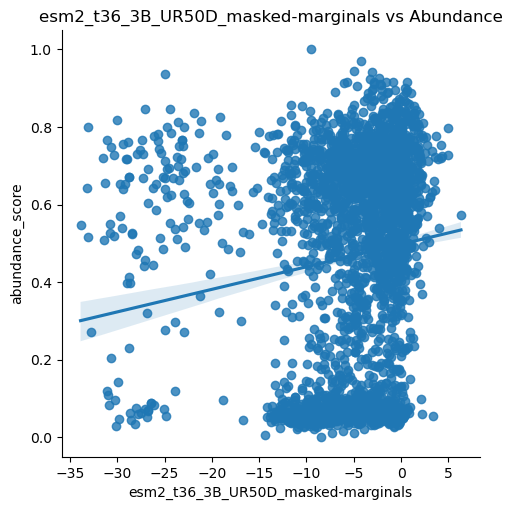

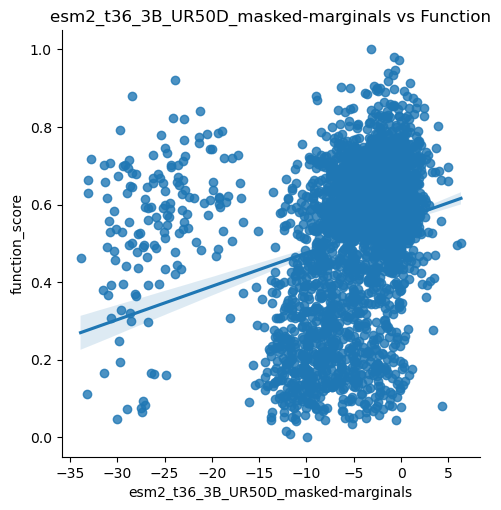

In [16]:
score_plotting(nudt15_if, 'esm2_t36_3B_UR50D_masked-marginals')

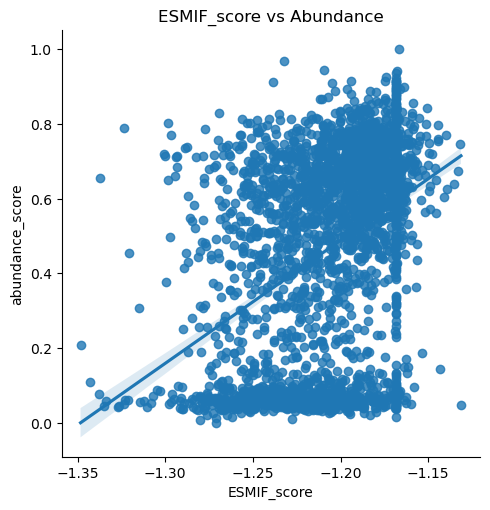

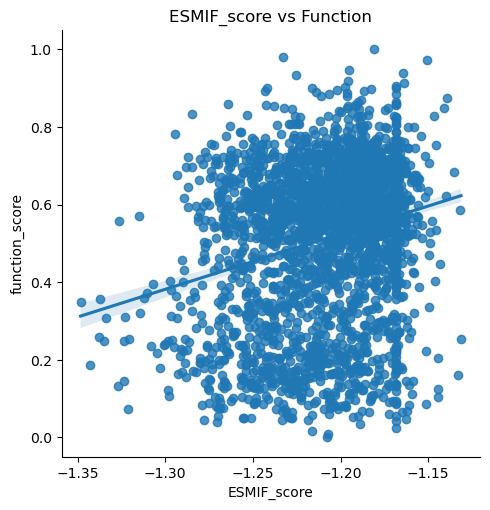

In [17]:
score_plotting(nudt15_if, 'ESMIF_score')

## PTEN

In [18]:
# Reproduce everything with PTEN
pten_if = pd.read_csv('PTEN.csv', index_col=0)
pten_1v_wt_marginals = pd.read_csv('PTEN_wt-marginals.csv', index_col=0)
pten_1v_masked_marginals = pd.read_csv('PTEN_masked-marginals.csv', index_col=0)


In [19]:
pten_if = pten_if.merge(pten_1v_wt_marginals, left_index=True, right_index=True)
pten_if = pten_if.merge(pten_1v_masked_marginals, left_index=True, right_index=True)
pten_if = pten_if.loc[:, ~pten_if.columns.str.endswith('_x')]
pten_if = pten_if.loc[:, ~pten_if.columns.str.endswith('_y')]


In [20]:
pten_if.corr(method ='pearson')[['function_score', 'abundance_score']]

,function_score,abundance_score
esm1v_t33_650M_UR90S_1_wt-marginals,0.185132,0.155037
esm1v_t33_650M_UR90S_2_wt-marginals,0.151181,0.149775
esm1v_t33_650M_UR90S_3_wt-marginals,0.201256,0.168691
esm1v_t33_650M_UR90S_4_wt-marginals,0.206334,0.191882
esm1v_t33_650M_UR90S_5_wt-marginals,0.178695,0.159046
esm2_t33_650M_UR50D_wt-marginals,0.230525,0.222357
esm2_t36_3B_UR50D_wt-marginals,0.072389,0.045039
0,0.637979,0.500643
1,-0.088224,-0.039108
2,0.561509,0.426778


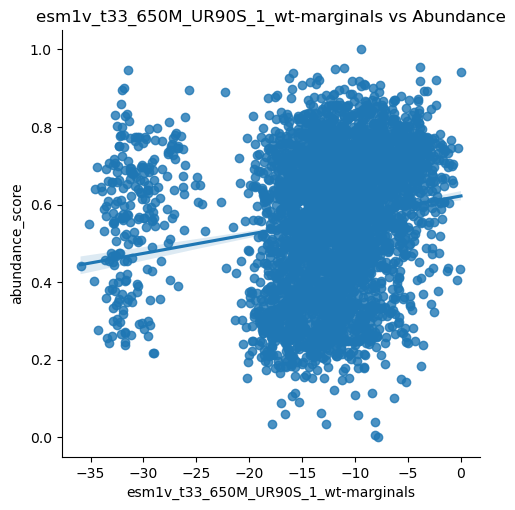

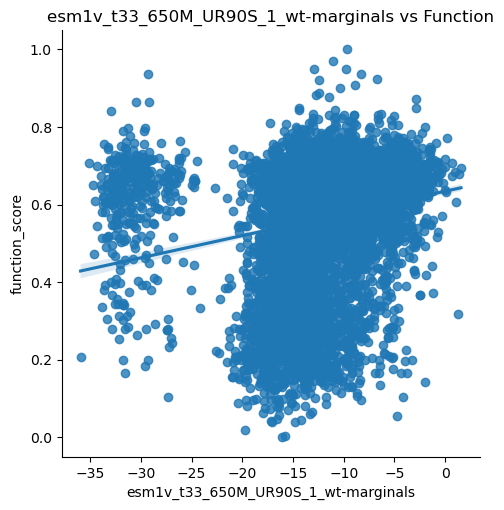

In [21]:
score_plotting(pten_if, 'esm1v_t33_650M_UR90S_1_wt-marginals')

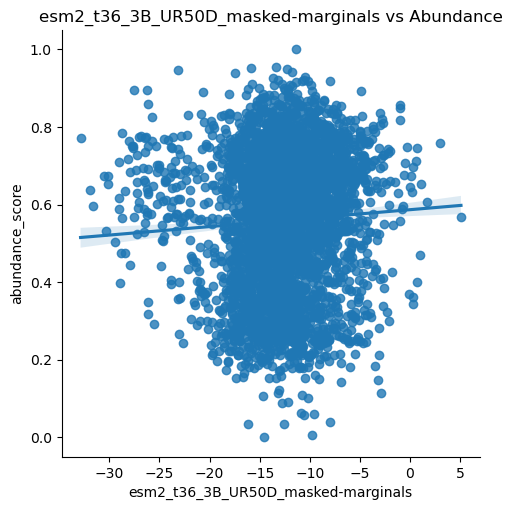

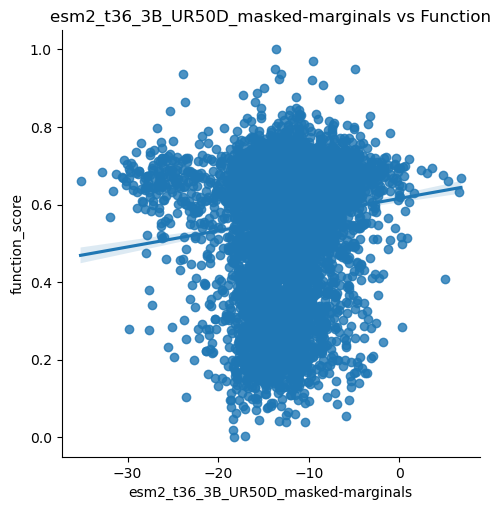

In [22]:
score_plotting(pten_if, 'esm2_t36_3B_UR50D_masked-marginals')

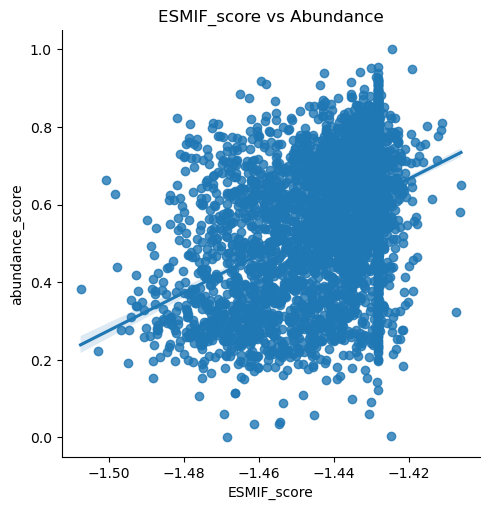

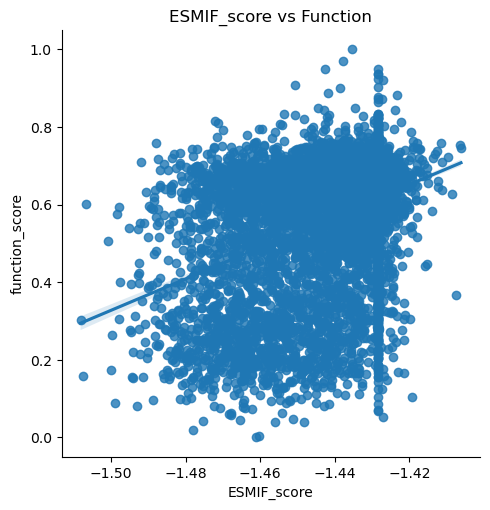

In [23]:
score_plotting(pten_if, 'ESMIF_score')